In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"resultTables\paper_testsetDeep.csv")
df = df.drop("test", axis=1)
df = df.applymap(lambda x: np.round(float(x.split("±")[0]), 3))
avgs = list(df.mean().round(3).values)

df = pd.read_csv(r"resultTables\paper_testsetDeep.csv")
df = df.drop("test", axis=1)
df = df.applymap(lambda x: np.round(float(x.split("±")[1]), 3))
stds = list(df.avg().round(3).values)


for i in range(len(avgs)):
    print(str(avgs[i]) + " ± " + str(stds[i]), end=', ')

0.513 ± 0.003, 0.671 ± 0.005, 0.755 ± 0.003, 0.637 ± 0.012, 0.671 ± 0.005, 0.008 ± 0.001, -5.413 ± 0.571, 7.147 ± 0.418, -91.876 ± 13.097, 102.746 ± 12.703, 1.004 ± 0.971, 4.009 ± 0.925, -0.507 ± 0.128, 0.907 ± 0.125, 

In [17]:
from PIL import Image
import os

# Path to the folder containing the images
input_folder = r"C:\Users\ricca\Desktop\Thesis\data\MASKSTESTStdNames"

# Path to the folder where resized images will be saved
output_folder = r"C:\Users\ricca\Desktop\Thesis\data\MASKSTESTStdNames320"

# Target size for resizing
target_size = (320, 320)

# Iterate through each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif', '.tif')):  # Add more extensions if needed
        # Open the image
        image_path = os.path.join(input_folder, filename)
        img = Image.open(image_path)
        
        # Resize the image
        resized_img = img.resize(target_size, Image.ANTIALIAS)
        
        # Save the resized image to the output folder
        output_path = os.path.join(output_folder, filename)
        resized_img.save(output_path)
        
        #print(f"Resized {filename} to {target_size}")


# images Comparison

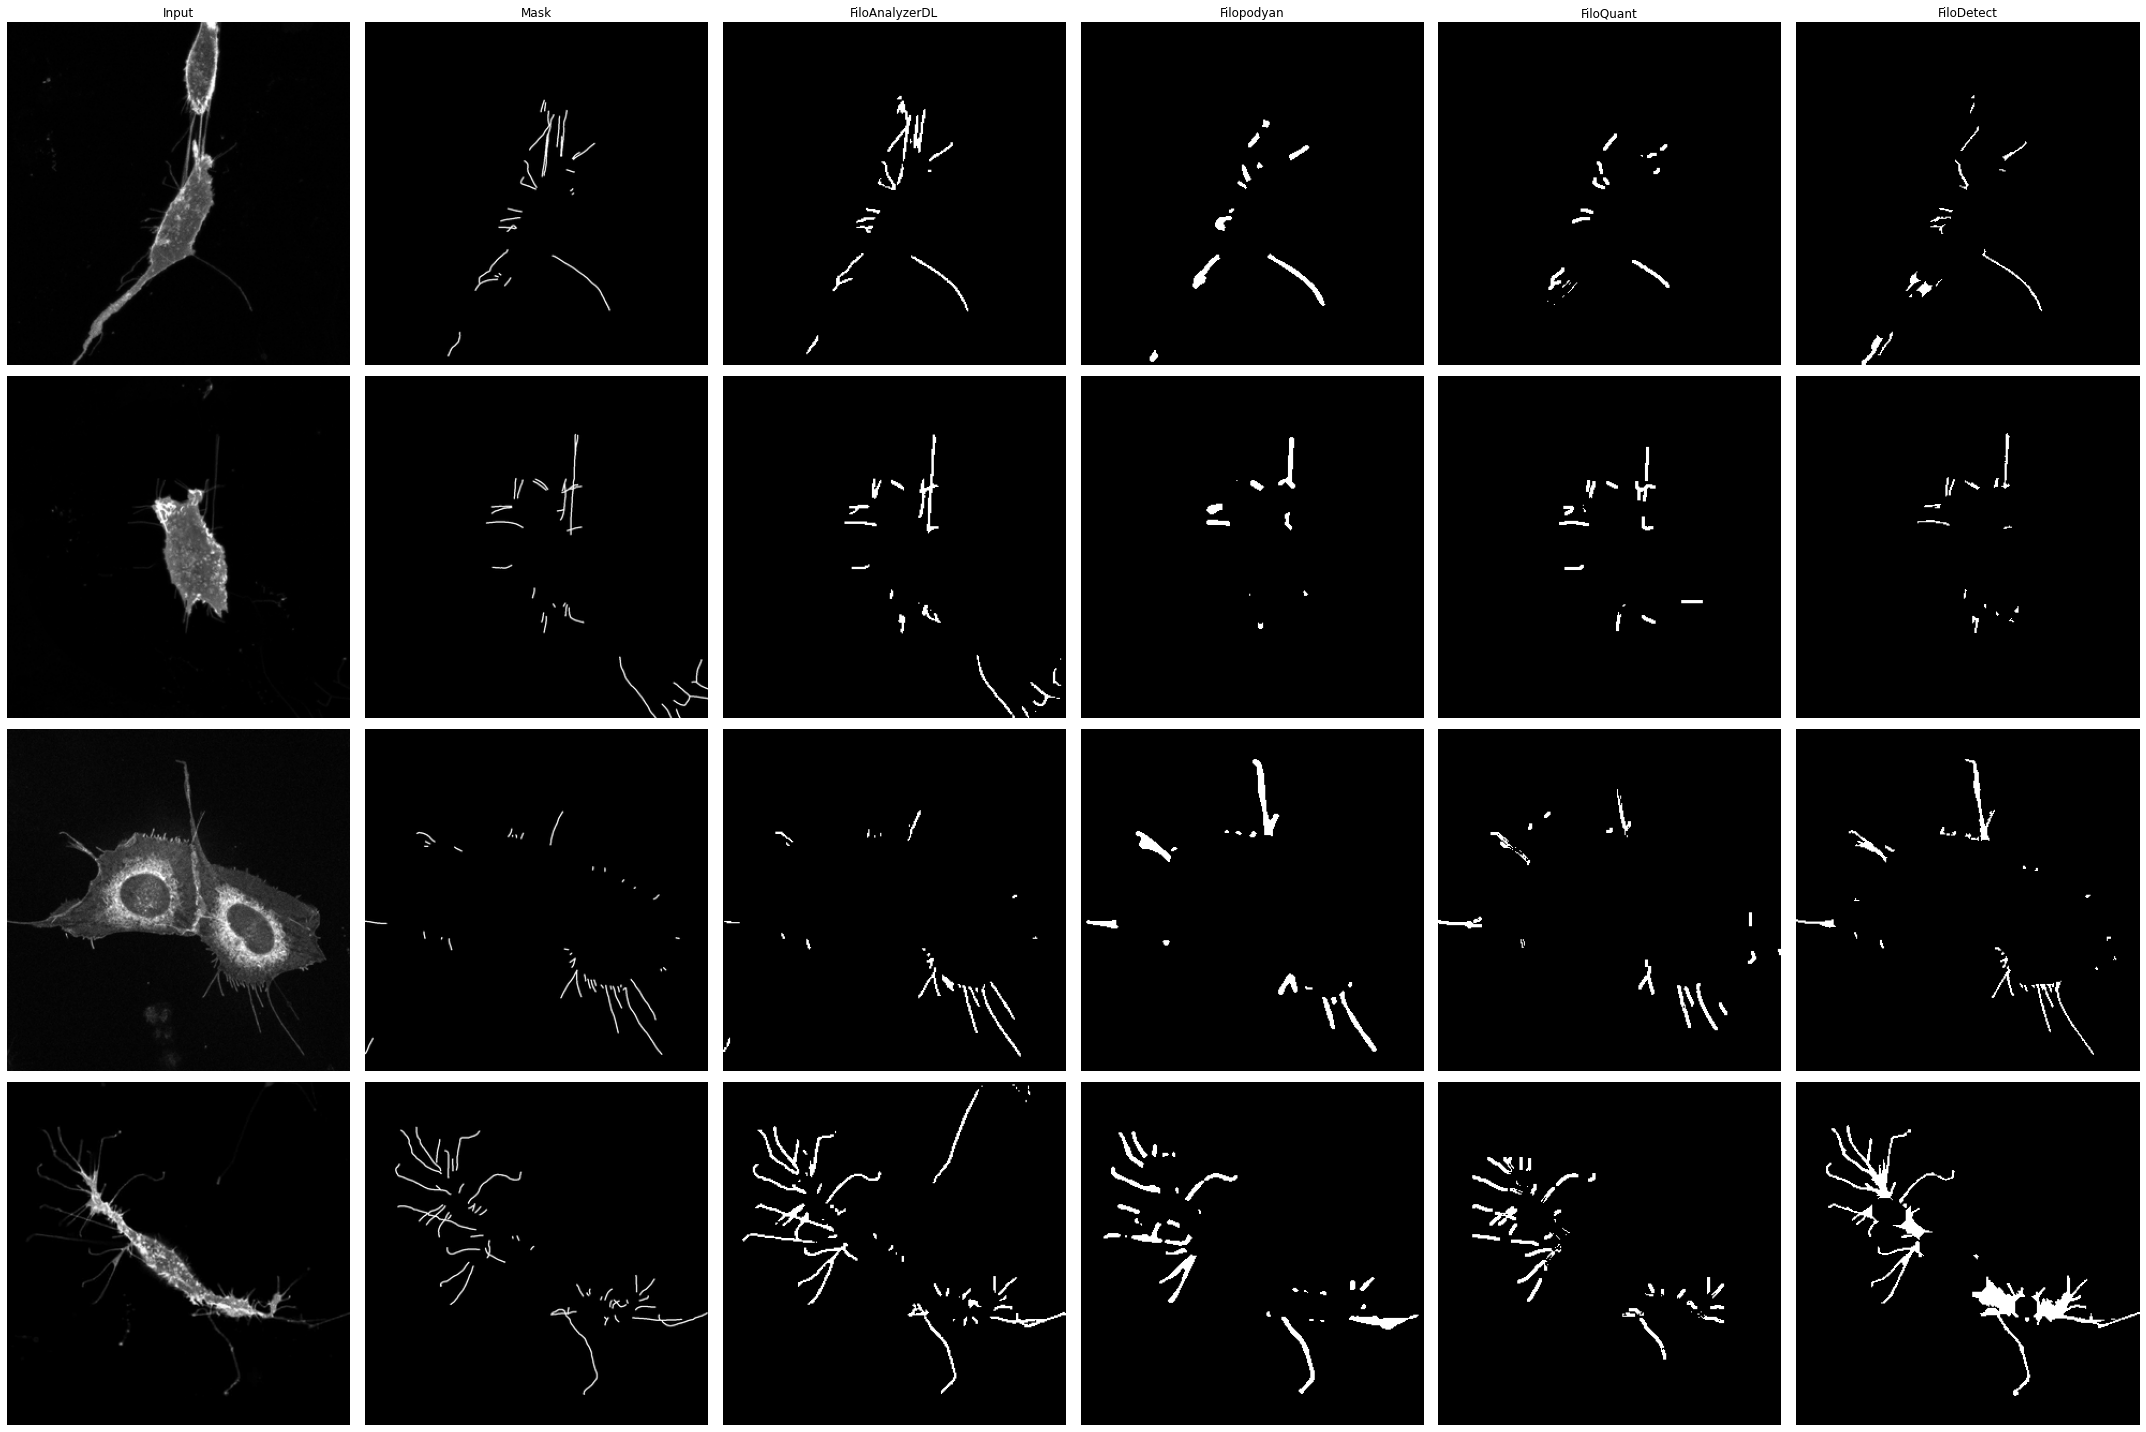

In [19]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Folder paths
folder_path = r'C:\Users\ricca\Desktop\Thesis\data\FinalComparisons\320'
#folder_path = r'C:\Users\ricca\Desktop\Thesis\data\FinalComparisons\meglio filoanalyzer'
subfolders = ['input', 'mask', 'filoanalyzerdl', 'filopodyan', 'filoquant', 'filodetect']
methods = ['Input', 'Mask', 'FiloAnalyzerDL', 'Filopodyan', 'FiloQuant', 'FiloDetect']

# Get filenames without extension from the filoanalyzer folder
filenames = []
filoanalyzer_folder = os.path.join(folder_path, 'input')
for filename in os.listdir(filoanalyzer_folder):
    name, ext = os.path.splitext(filename)
    if ext == '.png' or ext == '.tif':
        filenames.append(name)

# Group images by filename
image_groups = {name: [] for name in filenames}
for subfolder in subfolders:
    subfolder_path = os.path.join(folder_path, subfolder)
    for filename in filenames:
        png_path = os.path.join(subfolder_path, filename + '.png')
        tif_path = os.path.join(subfolder_path, filename + '.tif')
        
        if os.path.exists(png_path):
            image_path = png_path
        elif os.path.exists(tif_path):
            image_path = tif_path
        else:
            print("MISSING IMAGE", png_path, tif_path)
            continue
        
        image = Image.open(image_path)

        if subfolder == "filoanalyzer":
            image = np.array(image)
            #print(image.dtype, image.min(), image.max())
            #plt.imshow(image), plt.show()
        if subfolder == "filoquant":
            image = np.array(image)
            image = ((image[:,:,0] > 100) & (image[:,:,1] < 100)).astype(np.uint8) * 255
        if subfolder == "filopodyan":
            pass
            # image = np.array(image)
            # image = (image[:,:,0] < image.mean()) & (image[:,:,2] > image.mean())
            # des = image * 255
            # contour,hier = cv2.findContours(des,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
            # for cnt in contour:
            #     cv2.drawContours(des,[cnt],0,255,-1)
            # image = des
        image_groups[filename].append(image)

# Visualize images using matplotlib subplots
num_rows = len(filenames)
num_cols = len(subfolders)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 20))

for i, filename in enumerate(filenames):
    for j, subfolder in enumerate(subfolders):
        ax = axes[i, j]
        ax.axis('off')
        if i == 0:
            ax.set_title(methods[j])
        
        if image_groups[filename]:
            image = image_groups[filename].pop(0)
            ax.imshow(image, cmap='gray')
        else:
            ax.text(0.5, 0.5, "No image", va="center", ha="center")
            
plt.tight_layout()
plt.show()


# Folds barplot

In [113]:
import pandas as pd
df = pd.read_csv("resultTables/DLTorchConfrontoBackbones.csv")


df = pd.concat([
    pd.read_csv("resultTables/DLTorchConfrontoBackbones.csv"),
    pd.read_csv("resultTables/DLTorchConfrontoArchitetture.csv",),
    pd.read_csv("resultTables/DLTorchConfrontoLoss.csv")
], ignore_index=True)

df = df.dropna()
for col in df.columns[1:]:
    df[col] = df[col].apply(lambda x: float(x.split("±")[0]))

df = df.groupby("model").mean()
df = df.abs()
#df = df.T
df

,IOU,DICE,PRECISION,RECALL,F1,MSE,Filo # difference,Filo # abs difference,Filo len difference,Filo len abs difference,Single filo # diff,Single filo # abs diff,Fused filo # diff,Fused filo # abs diff
model,,,,,,,,,,,,,,
fold 1,0.502887,0.656807,0.701680,0.631591,0.656807,0.018201,7.818750,8.631250,144.556250,152.460417,1.343750,4.377083,1.225000,1.404167
fold 10,0.436438,0.600800,0.676433,0.575933,0.600800,0.014693,12.308333,15.662500,136.679167,151.091667,2.806250,6.802083,2.606250,2.847917
fold 2,0.488178,0.653076,0.737616,0.593739,0.653076,0.017346,7.843750,9.093750,142.572917,143.156250,0.008333,3.775000,1.681250,1.743750
fold 3,0.538855,0.690869,0.735411,0.667046,0.690869,0.025201,17.864583,18.881250,292.529167,292.633333,1.308333,3.616667,3.606250,3.777083
fold 4,0.424389,0.583375,0.642767,0.549199,0.583375,0.026835,4.916667,9.866667,225.137500,230.612500,1.916667,7.887500,0.979167,1.529167
fold 5,0.470396,0.636706,0.721911,0.580214,0.636706,0.021152,6.437500,7.475000,145.172917,155.031250,1.318750,4.035417,0.808333,0.954167
fold 6,0.370121,0.521721,0.689795,0.486121,0.529472,0.009630,4.591667,9.050000,47.722917,83.043750,3.639583,7.114583,0.008333,0.545833
fold 7,0.409822,0.575319,0.621860,0.578776,0.575319,0.021302,9.310417,9.647917,151.454167,220.141667,1.066667,8.016667,0.216667,0.716667
fold 8,0.474803,0.639583,0.725225,0.581372,0.639583,0.008906,7.572917,7.731250,65.681250,69.152083,0.441667,3.075000,1.408333,1.462500


In [116]:
import plotly.graph_objects as go
animals = [1, 10, 2, 3,4,5,6,7,8,9]

fig = go.Figure(data=[
    go.Bar(name='IOU', x=animals, y=df["IOU"], text=np.round(df["IOU"], 2), textposition='auto'),
    # go.Bar(name='PRECISION', x=animals, y=df["PRECISION"], text=np.round(df["PRECISION"],2), textposition='auto'),
    # go.Bar(name='RECALL', x=animals, y=df["RECALL"], text=np.round(df["RECALL"],2), textposition='auto'),
    go.Bar(name='F1', x=animals, y=df["F1"], text=np.round(df["F1"],2), textposition='auto'),
])
# Change the bar mode
fig.update_layout(barmode='group', yaxis_range=[0.32, 0.90])

fig.update_xaxes(tickfont=dict(size=15), titlefont=dict(size=20))
fig.update_yaxes(tickfont=dict(size=15), titlefont=dict(size=20))

fig.update_layout(legend = dict(font = dict(size = 15)),
                  legend_title = dict(font = dict(size = 15)))

fig.show()

In [ ]:
fig = px.line_polar(df, r='IOU', line_close=True)
fig = px.line_polar(df, r='F1', line_close=True)
fig.show()

# Crea aggregato

In [70]:
import pandas as pd
df = pd.read_csv("resultTables/DLTorchConfrontoBackbones.csv")
df

,model,IOU,DICE,PRECISION,RECALL,F1,MSE,Filo # difference,Filo # abs difference,Filo len difference,Filo len abs difference,Single filo # diff,Single filo # abs diff,Fused filo # diff,Fused filo # abs diff
0,unet++ resnet18 jaccard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fold 1,0.49118597010584375 ± 0.13644909939533068,0.6469566198586254 ± 0.12942025063583784,0.6494761292307641 ± 0.06022651286503345,0.6632599878014405 ± 0.19704807958581236,0.6469566198586254 ± 0.12942025063583787,0.019541016 ± 0.013102853,-11.6 ± 9.068627239003707,11.6 ± 9.068627239003707,-153.8 ± 161.62598800935447,158.2 ± 157.3218357380818,-1.2 ± 4.621688003316538,3.2 ± 3.54400902933387,-1.4 ± 1.3564659966250536,1.8 ± 0.7483314773547883
2,fold 2,0.46473780123957964 ± 0.05277078285379661,0.6328595395235518 ± 0.04743587551311781,0.6956820153027137 ± 0.05519345731322575,0.5857053290313459 ± 0.06637515656321549,0.6328595395235518 ± 0.047435875513117835,0.018638672 ± 0.007206789,-9.6 ± 9.221713506718803,9.6 ± 9.221713506718803,-165.0 ± 129.6688088940436,165.0 ± 129.6688088940436,-2.2 ± 2.85657137141714,3.0 ± 2.0,-1.8 ± 1.8330302779823362,1.8 ± 1.8330302779823362
3,fold 3,0.5001964941076225 ± 0.1351193582174341,0.6548741904243432 ± 0.1331750333697864,0.7097703198815644 ± 0.08942489552801083,0.6350606884217747 ± 0.18059723060416352,0.6548741904243434 ± 0.13317503336978637,0.027232423 ± 0.020278608,-19.2 ± 23.54060322081828,21.6 ± 21.359775279716782,-334.0 ± 305.3817283335727,334.0 ± 305.3817283335727,2.4 ± 3.136877428271624,2.8 ± 2.785677655436824,-3.6 ± 4.758150901348128,3.6 ± 4.758150901348128
4,fold 4,0.3891003957262853 ± 0.14421550667888258,0.5437917911095468 ± 0.15881934562889427,0.6258213448389427 ± 0.1099895078495665,0.49156848693208455 ± 0.18031185190592308,0.5437917911095468 ± 0.15881934562889427,0.027464842 ± 0.006385543,-10.8 ± 7.520638270785266,10.8 ± 7.520638270785266,-303.2 ± 95.13022653184423,303.2 ± 95.13022653184423,-0.8 ± 6.794115100585212,5.6 ± 3.9293765408777004,-1.8 ± 1.1661903789690602,1.8 ± 1.1661903789690602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,fold 6,0.41515310058652466 ± 0.14561133621578334,0.571262325962219 ± 0.15131565716520043,0.7069623899515693 ± 0.12026468937515106,0.5368153503300868 ± 0.20250171557472257,0.571262325962219 ± 0.15131565716520043,0.008941406 ± 0.0045003854,-4.6 ± 10.85541339608953,10.2 ± 5.912698199637793,-44.0 ± 81.36829849517562,80.0 ± 46.441360875839976,-2.0 ± 6.6932802122726045,6.0 ± 3.5777087639996634,0.0 ± 0.8944271909999159,0.8 ± 0.4000000000000001
876,fold 7,0.4086349117928135 ± 0.08316674816790563,0.5751286198354875 ± 0.08574714149429072,0.5709988956198686 ± 0.15295403544745964,0.6102989198476731 ± 0.09372058830560974,0.5751286198354874 ± 0.08574714149429068,0.022058595 ± 0.012845128,-9.6 ± 4.029888335921977,9.6 ± 4.029888335921977,-123.8 ± 222.61931632273064,179.0 ± 181.23134386744474,-1.6 ± 8.935323161475472,8.0 ± 4.2895221179054435,0.4 ± 0.48989794855663565,0.4 ± 0.48989794855663565
877,fold 8,0.4432184019159779 ± 0.08935675724499911,0.6089511303474671 ± 0.08502886687566555,0.6842311372823383 ± 0.10702898358668245,0.5598733328041287 ± 0.09342666983934922,0.6089511303474671 ± 0.08502886687566552,0.0094375 ± 0.0034272675,-7.6 ± 3.5552777669262356,7.6 ± 3.5552777669262356,-65.8 ± 71.32853566420665,82.6 ± 50.93760889558912,0.8 ± 1.5999999999999999,1.6 ± 0.8000000000000002,-1.6 ± 0.8,1.6 ± 0.8
878,fold 9,0.3971974982336967 ± 0.04650937894639238,0.5669759264376653 ± 0.047698403990710035,0.7222777161101821 ± 0.08601359456888227,0.47826809810646465 ± 0.07470215565317519,0.5669759264376653 ± 0.04769840399071007,0.00790625 ± 0.0028292858,-12.0 ± 6.06630035524124,12.0 ± 6.06630035524124,-120.6 ± 48.50814364619615,120.6 ± 48.50814364619615,-4.8 ± 6.368673331236262,5.6 ± 5.678027826631356,-1.2 ± 0.9797958971132713,1.2 ± 0.9797958971132713


In [71]:
model_names = list(df[df["model"].str.contains("jaccard")]["model"])
print(len(model_names))
print(model_names)

80
['unet++ resnet18 jaccard', 'unet++ resnet34 jaccard', 'unet++ resnet50 jaccard', 'unet++ resnet101 jaccard', 'unet++ resnet152 jaccard', 'unet++ resnext50_32x4d jaccard', 'unet++ vgg11 jaccard', 'unet++ vgg11_bn jaccard', 'unet++ vgg13 jaccard', 'unet++ vgg13_bn jaccard', 'unet++ vgg16 jaccard', 'unet++ vgg16_bn jaccard', 'unet++ vgg19 jaccard', 'unet++ vgg19_bn jaccard', 'unet++ efficientnet-b0 jaccard', 'unet++ efficientnet-b1 jaccard', 'unet++ efficientnet-b2 jaccard', 'unet++ efficientnet-b3 jaccard', 'unet++ efficientnet-b4 jaccard', 'unet++ efficientnet-b5 jaccard', 'unet++ efficientnet-b6 jaccard', 'unet++ mobilenet_v2 jaccard', 'unet++ timm-efficientnet-b0 jaccard', 'unet++ timm-efficientnet-b1 jaccard', 'unet++ timm-efficientnet-b2 jaccard', 'unet++ timm-efficientnet-b3 jaccard', 'unet++ timm-efficientnet-b4 jaccard', 'unet++ timm-efficientnet-b5 jaccard', 'unet++ timm-efficientnet-b6 jaccard', 'unet++ timm-tf_efficientnet_lite0 jaccard', 'unet++ timm-tf_efficientnet_lite1

In [72]:
df = df.dropna()
df = df.drop(df.columns[0], axis=1)

In [73]:
for col in df.columns:
    print(col)
    df[col] = df[col].apply(lambda x: float(x.split("±")[0]))
print(len(df))
df.head(10)

IOU
DICE
PRECISION
RECALL
F1
MSE
Filo # difference
Filo # abs difference
Filo len difference
Filo len abs difference
Single filo # diff
Single filo # abs diff
Fused filo # diff
Fused filo # abs diff
800


,IOU,DICE,PRECISION,RECALL,F1,MSE,Filo # difference,Filo # abs difference,Filo len difference,Filo len abs difference,Single filo # diff,Single filo # abs diff,Fused filo # diff,Fused filo # abs diff
1,0.491186,0.646957,0.649476,0.663260,0.646957,0.019541,-11.6,11.6,-153.8,158.2,-1.2,3.2,-1.4,1.8
2,0.464738,0.632860,0.695682,0.585705,0.632860,0.018639,-9.6,9.6,-165.0,165.0,-2.2,3.0,-1.8,1.8
3,0.500196,0.654874,0.709770,0.635061,0.654874,0.027232,-19.2,21.6,-334.0,334.0,2.4,2.8,-3.6,3.6
4,0.389100,0.543792,0.625821,0.491568,0.543792,0.027465,-10.8,10.8,-303.2,303.2,-0.8,5.6,-1.8,1.8
5,0.411538,0.580704,0.727763,0.490637,0.580704,0.022850,-7.4,10.6,-250.4,250.4,4.8,7.2,-1.4,1.4
6,0.384666,0.546297,0.678231,0.489321,0.546297,0.009660,-5.8,8.6,-58.8,62.8,-3.8,7.4,-0.2,0.2
7,0.357139,0.520573,0.718103,0.431881,0.520573,0.020217,-15.6,15.6,-320.8,320.8,-1.6,8.8,-1.0,1.0
8,0.440110,0.605826,0.704186,0.537201,0.605826,0.009537,-7.2,7.2,-89.8,89.8,-1.4,2.6,-1.4,1.4
9,0.462377,0.629928,0.667536,0.606225,0.629928,0.007672,-10.4,10.4,-77.6,77.6,-3.2,4.4,-1.0,1.0
10,0.396514,0.556381,0.732113,0.470306,0.556381,0.014596,-16.2,18.6,-207.0,207.0,1.2,5.6,-3.0,3.0


In [74]:
aggr_df = pd.DataFrame(columns="IOU,DICE,PRECISION,RECALL,F1,MSE,Filo # difference,Filo # abs difference,Filo len difference,Filo len abs difference,Single filo # diff,Single filo # abs diff,Fused filo # diff,Fused filo # abs diff".split(","))

count = 0
for i in range(0, int(len(df) / 10)):
    print(model_names[i][7:].replace("jaccard", "").replace("_", "\_"), end=", ")
    count += 1
    #print(*list(df[i*10:(i+1)*10].mean()), sep=", ")
    means = list(df[i*10:(i+1)*10].mean())
    stds = list(df[i*10:(i+1)*10].std())
    assert len(means) == len(stds)
    print(*[str(np.round(means[i], 2)) + " $\pm$ " + str(np.round(stds[i], 2)) for i in range(len(means))], sep=", ")
    #print(*[str(np.round(means[i], 2)) for i in range(len(means))], sep=", ")
    aggr_df.loc[count] = list(df[i*10:(i+1)*10].mean())

resnet18 , 0.43 $\pm$ 0.05, 0.59 $\pm$ 0.05, 0.69 $\pm$ 0.03, 0.54 $\pm$ 0.08, 0.59 $\pm$ 0.05, 0.02 $\pm$ 0.01, -11.38 $\pm$ 4.36, 12.46 $\pm$ 4.63, -196.04 $\pm$ 103.31, 196.88 $\pm$ 102.53, -0.58 $\pm$ 2.65, 5.06 $\pm$ 2.21, -1.66 $\pm$ 0.99, 1.7 $\pm$ 0.99
resnet34 , 0.45 $\pm$ 0.04, 0.61 $\pm$ 0.04, 0.69 $\pm$ 0.04, 0.57 $\pm$ 0.06, 0.61 $\pm$ 0.04, 0.02 $\pm$ 0.01, -10.26 $\pm$ 5.22, 11.22 $\pm$ 5.25, -167.72 $\pm$ 103.36, 168.16 $\pm$ 103.29, -0.96 $\pm$ 2.54, 4.8 $\pm$ 2.43, -1.36 $\pm$ 1.15, 1.4 $\pm$ 1.09
resnet50 , 0.46 $\pm$ 0.05, 0.62 $\pm$ 0.05, 0.68 $\pm$ 0.06, 0.59 $\pm$ 0.05, 0.62 $\pm$ 0.05, 0.02 $\pm$ 0.01, -9.66 $\pm$ 6.54, 11.9 $\pm$ 4.31, -145.56 $\pm$ 106.53, 161.0 $\pm$ 83.45, -0.14 $\pm$ 2.14, 5.46 $\pm$ 2.21, -1.54 $\pm$ 1.27, 1.7 $\pm$ 1.14
resnet101 , 0.45 $\pm$ 0.06, 0.61 $\pm$ 0.06, 0.69 $\pm$ 0.03, 0.57 $\pm$ 0.07, 0.61 $\pm$ 0.06, 0.02 $\pm$ 0.01, -10.64 $\pm$ 4.75, 11.96 $\pm$ 4.62, -158.58 $\pm$ 91.49, 163.34 $\pm$ 87.53, -1.3 $\pm$ 2.16, 5.58 $\pm$ 2.

In [75]:
import numpy as np

In [76]:
aggr_df = pd.DataFrame(columns="IOU,DICE,PRECISION,RECALL,F1,MSE,Filo # difference,Filo # abs difference,Filo len difference,Filo len abs difference,Single filo # diff,Single filo # abs diff,Fused filo # diff,Fused filo # abs diff".split(","))

count = 0
for i in range(0, int(len(df) / 10)):
    print(model_names[i][7:].replace("jaccard", "").replace("_", "\_"), end=", ")
    count += 1
    #print(*list(df[i*10:(i+1)*10].mean()), sep=", ")
    means = list(df[i*10:(i+1)*10].mean())
    stds = list(df[i*10:(i+1)*10].std())
    assert len(means) == len(stds)
    #print(*[str(np.round(means[i], 2)) + " $\pm$ " + str(np.round(stds[i], 2)) for i in range(len(means))], sep=", ")
    print(*[str(np.round(means[i], 2)) for i in range(len(means))], sep=", ")
    aggr_df.loc[count] = list(df[i*10:(i+1)*10].mean())

resnet18 , 0.43, 0.59, 0.69, 0.54, 0.59, 0.02, -11.38, 12.46, -196.04, 196.88, -0.58, 5.06, -1.66, 1.7
resnet34 , 0.45, 0.61, 0.69, 0.57, 0.61, 0.02, -10.26, 11.22, -167.72, 168.16, -0.96, 4.8, -1.36, 1.4
resnet50 , 0.46, 0.62, 0.68, 0.59, 0.62, 0.02, -9.66, 11.9, -145.56, 161.0, -0.14, 5.46, -1.54, 1.7
resnet101 , 0.45, 0.61, 0.69, 0.57, 0.61, 0.02, -10.64, 11.96, -158.58, 163.34, -1.3, 5.58, -1.6, 1.64
resnet152 , 0.47, 0.63, 0.68, 0.62, 0.63, 0.02, -8.94, 10.14, -131.56, 141.72, -0.28, 4.8, -1.42, 1.74
resnext50\_32x4d , 0.45, 0.62, 0.7, 0.58, 0.62, 0.02, -10.38, 11.38, -157.92, 164.28, -0.74, 4.82, -1.52, 1.72
vgg11 , 0.48, 0.64, 0.68, 0.62, 0.64, 0.02, -8.18, 9.7, -123.62, 136.18, -1.22, 5.06, -1.08, 1.64
vgg11\_bn , 0.46, 0.62, 0.7, 0.57, 0.62, 0.02, -8.98, 10.7, -144.46, 146.86, 0.26, 5.46, -1.56, 1.6
vgg13 , 0.46, 0.62, 0.74, 0.57, 0.62, 0.02, -8.82, 10.5, -154.28, 157.16, 0.28, 5.64, -1.58, 1.66
vgg13\_bn , 0.48, 0.64, 0.69, 0.62, 0.64, 0.02, -7.96, 9.16, -107.62, 120.66, 0.26

In [77]:
aggr_df["model"] = model_names
aggr_df

,IOU,DICE,PRECISION,RECALL,F1,MSE,Filo # difference,Filo # abs difference,Filo len difference,Filo len abs difference,Single filo # diff,Single filo # abs diff,Fused filo # diff,Fused filo # abs diff,model
1,0.429756,0.591819,0.690868,0.540117,0.591819,0.017741,-11.38,12.46,-196.04,196.88,-0.58,5.06,-1.66,1.70,unet++ resnet18 jaccard
2,0.447956,0.610291,0.685088,0.570557,0.610291,0.017597,-10.26,11.22,-167.72,168.16,-0.96,4.80,-1.36,1.40,unet++ resnet34 jaccard
3,0.457018,0.619897,0.682314,0.592625,0.619897,0.017239,-9.66,11.90,-145.56,161.00,-0.14,5.46,-1.54,1.70,unet++ resnet50 jaccard
4,0.448903,0.609740,0.694507,0.566534,0.609740,0.017378,-10.64,11.96,-158.58,163.34,-1.30,5.58,-1.60,1.64,unet++ resnet101 jaccard
5,0.473656,0.634149,0.679287,0.617956,0.634149,0.016811,-8.94,10.14,-131.56,141.72,-0.28,4.80,-1.42,1.74,unet++ resnet152 jaccard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.363064,0.519127,0.600762,0.480818,0.530394,0.020913,-10.00,12.00,-222.34,238.46,1.06,7.14,-1.44,1.68,unet++ timm-mobilenetv3_small_100 jaccard
77,0.344519,0.497243,0.587957,0.466938,0.507714,0.021672,-11.28,13.52,-224.82,231.70,1.54,7.02,-1.46,1.66,unet++ timm-mobilenetv3_small_minimal_100 jaccard
78,0.426412,0.589718,0.653177,0.566159,0.589718,0.018651,-9.16,11.20,-183.68,202.36,0.76,5.56,-1.16,1.52,unet++ timm-gernet_s jaccard
79,0.458637,0.621069,0.707993,0.578496,0.621069,0.016809,-9.88,11.48,-169.10,172.82,-0.86,4.82,-1.36,1.52,unet++ timm-gernet_m jaccard


# Grafico confronto backbones

In [78]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

df = pd.read_csv("resultTables/DLTorchConfrontoBackbonesAggregated.csv")
df = aggr_df

def get_type(name):
    if "resnet" in name:
        return "RESNET"
    if "vgg" in name:
        return "VGG"
    if "efficientnet" in name:
        return "EFFICIENTNET"
    if "mobilenet" in name:
        return "MOBILENET"
    if "regnet" in name:
        return "REGNET"
    if "resnest" in name:
        return "RESNEST"
    if "resnext" in name:
        return "RESNEXT"
    if "res2" in name:
        return "RES2NET"
    if "gernet" in name:
        return "GERNET"
    return name


df["Type"] = df["model"].apply(get_type)
df["Size"] = [15970594,
              26078754,
              48985890,
              67978018,
              83621666,
              48457762,
              33853282,
              33858786,
              34037794,
              34043682,
              39347490,
              39355938,
              44657186,
              44668194,
              6569726,
              9075362,
              10401444,
              13624938,
              20813258,
              31910226,
              44665274,
              6824866,
              6569726,
              9075362,
              10401444,
              13624938,
              20813258,
              31910226,
              44665274,
              5933186,
              6697858,
              7511522,
              9781922,
              14854082,
              34040546,
              40498306,
              50912098,
              73216066,
              53846450,
              49105858,
              49127978,
              68635546,
              60480306,
              71832634,
              48716162,
              48488674,
              48100322,
              5188498,
              7805442,
              9642562,
              11518594,
              14769106,
              21754402,
              30122658,
              40761026,
              49021538,
              65296194,
              76315394,
              143319202,
              5666702,
              7643690,
              9804210,
              10757882,
              15664536,
              27192396,
              28047738,
              40603854,
              56493086,
              71012682,
              105931510,
              179370316,
              5079666,
              6917490,
              5358746,
              3007466,
              3712930,
              3214810,
              13333088,
              30979586,
              40914946]


In [79]:
df.head()
df

,IOU,DICE,PRECISION,RECALL,F1,MSE,Filo # difference,Filo # abs difference,Filo len difference,Filo len abs difference,Single filo # diff,Single filo # abs diff,Fused filo # diff,Fused filo # abs diff,model,Type,Size
1,0.429756,0.591819,0.690868,0.540117,0.591819,0.017741,-11.38,12.46,-196.04,196.88,-0.58,5.06,-1.66,1.70,unet++ resnet18 jaccard,RESNET,15970594
2,0.447956,0.610291,0.685088,0.570557,0.610291,0.017597,-10.26,11.22,-167.72,168.16,-0.96,4.80,-1.36,1.40,unet++ resnet34 jaccard,RESNET,26078754
3,0.457018,0.619897,0.682314,0.592625,0.619897,0.017239,-9.66,11.90,-145.56,161.00,-0.14,5.46,-1.54,1.70,unet++ resnet50 jaccard,RESNET,48985890
4,0.448903,0.609740,0.694507,0.566534,0.609740,0.017378,-10.64,11.96,-158.58,163.34,-1.30,5.58,-1.60,1.64,unet++ resnet101 jaccard,RESNET,67978018
5,0.473656,0.634149,0.679287,0.617956,0.634149,0.016811,-8.94,10.14,-131.56,141.72,-0.28,4.80,-1.42,1.74,unet++ resnet152 jaccard,RESNET,83621666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.363064,0.519127,0.600762,0.480818,0.530394,0.020913,-10.00,12.00,-222.34,238.46,1.06,7.14,-1.44,1.68,unet++ timm-mobilenetv3_small_100 jaccard,MOBILENET,3712930
77,0.344519,0.497243,0.587957,0.466938,0.507714,0.021672,-11.28,13.52,-224.82,231.70,1.54,7.02,-1.46,1.66,unet++ timm-mobilenetv3_small_minimal_100 jaccard,MOBILENET,3214810
78,0.426412,0.589718,0.653177,0.566159,0.589718,0.018651,-9.16,11.20,-183.68,202.36,0.76,5.56,-1.16,1.52,unet++ timm-gernet_s jaccard,GERNET,13333088
79,0.458637,0.621069,0.707993,0.578496,0.621069,0.016809,-9.88,11.48,-169.10,172.82,-0.86,4.82,-1.36,1.52,unet++ timm-gernet_m jaccard,GERNET,30979586


In [93]:
import pandas as pd
import plotly.express as px

#df = pd.read_csv("resultTables/DLTorchConfrontoBackbonesAggregated.csv")

df["Filo # difference"] = abs(df["Filo # difference"])
df["Filo #  difference"] = abs(df["Filo # abs difference"])
fig = px.scatter(df, x="IOU", y="Filo # difference", color="Type")

# Set hoverinfo to 'text' and provide text information for annotations
fig.update_traces(
    mode='markers',
    marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')),
    hoverinfo='text',
)


# Customize the x-axis and y-axis label and tick font size
fig.update_xaxes(title_text='IOU', tickfont=dict(size=15), titlefont=dict(size=20))
fig.update_yaxes(title_text='|Filopodia # difference|', tickfont=dict(size=15), titlefont=dict(size=20))

fig.update_layout(legend = dict(font = dict(size = 15)),
                  legend_title = dict(font = dict(size = 15)))

#fig.update_layout(xaxis_range=[0.05,0.2])
#fig.update_layout(yaxis_range=[-0.3,4.2])

fig.show()


In [64]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("resultTables/comparison.csv")

fig = px.scatter(df, x="IOU", y="Time", color="Method", labels={
    "x": "IOU",
    "y": "Filo # difference",
})

# Set hoverinfo to 'text' and provide text information for annotations
fig.update_traces(
    mode='markers',
    marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')),
    hoverinfo='text',
    text=df["Method"]  # Customize this according to your annotation needs
)

fig.show()


In [305]:
trace = {'type': 'scatter',
         'x': df["IOU"],
         'y': df["Time"],
         'text': df["Method"],
         'mode': 'markers+text',
         'textposition': 'top center'}

layout = {'xaxis': {'title': 'IOU'},
          'yaxis': {'title': 'Time [sec/img]'}}

plotly.offline.iplot({'data': [trace], 'layout': layout})

# Personalize the markers and add text annotations
trace['marker'] = {'size': 10, 'line': {'width': 1, 'color': 'black'}}

layout = {'xaxis': {'title': 'IOU'},
          'yaxis': {'title': 'Time [sec/img]'}}

fig = {'data': [trace], 'layout': layout}

plotly.offline.iplot(fig)

In [94]:
fig = px.scatter(df, x="IOU", y="Filo # abs difference", color="Type", hover_data=['model'], labels={
    "IOU": "IOU",
    "Filo # abs difference": "|Avg filpodia # difference|",
},)
fig.update_traces(marker=dict(size=10,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()


In [309]:
df

,Method,Time,IOU,Precision,Recall,F1,Filo # difference,Filo length difference,Unnamed: 8
0,FiloDetect,1.28,0.06,0.13,0.11,0.13,6669,6824,NaN
1,FiloQuant,3.69,0.09,0.25,0.14,0.17,364,1911,NaN
2,Filopodyan,1.73,0.17,0.25,0.35,0.31,27,1483,NaN
3,FiloAnalyzer,0.20,0.16,0.28,0.29,0.28,1425,6318,NaN
4,FiloAnalyzer (+ blur),0.20,0.18,0.34,0.31,0.31,64,1401,NaN


In [96]:
fig = px.scatter(df, x="Size", y="IOU", trendline="ols",trendline_options=dict(log_x=True), hover_data=['model'], labels={
    "IOU": "IOU",
    "Size": "Model size (# of parameters)",
},)

fig.update_xaxes(title_text='Model size (# of parameters)', tickfont=dict(size=15), titlefont=dict(size=20))
fig.update_yaxes(title_text='IOU', tickfont=dict(size=15), titlefont=dict(size=20))

fig.update_layout(legend = dict(font = dict(size = 15)),
                  legend_title = dict(font = dict(size = 15)))

fig.show()

In [99]:
df["Filo # difference"] = abs(df["Filo # difference"])
fig = px.scatter(df, x="Size", y="Filo # difference", labels={
    "Size": "Model size (# of parameters)",
    "Filo \# difference": "|Filo # difference|",
})


fig.update_xaxes(title_text='Model size (# of parameters)', tickfont=dict(size=15), titlefont=dict(size=20))
fig.update_yaxes(title_text='|Filo # difference|', tickfont=dict(size=15), titlefont=dict(size=20))

fig.update_layout(legend = dict(font = dict(size = 15)),
                  legend_title = dict(font = dict(size = 15)))
fig.show()

# Boxplot statistiche finali

In [106]:
import pandas as pd
df = pd.read_csv("resultTables/FINALI_imgSingole.csv")
#df = df[pd.to_numeric(df['PRECISION'], errors='coerce').notnull()]
#df = df[df.PRECISION.apply(lambda x: "nan" not in x)]
df = df.reset_index(drop=True)
df

,image,IOU,DICE,PRECISION,RECALL,F1,MSE,Filo # difference,Filo # abs difference,Filo len difference,Filo len abs difference,Single filo # diff,Single filo # abs diff,Fused filo # diff,Fused filo # abs diff
0,11,0.488204,0.656098,0.625154,0.690265,0.656098,0.010381,-12,12,9,9,-6,6,-2,2
1,12,0.537119,0.698864,0.746851,0.656672,0.698864,0.020459,-14,14,-280,280,-1,1,-4,4
2,15,0.624748,0.769040,0.787956,0.751011,0.769040,0.010898,-6,6,-40,40,-1,1,0,0
3,10,0.627414,0.771056,0.940409,0.653391,0.771056,0.009609,-12,12,-151,151,-1,1,-1,1
4,24,0.286859,0.445828,0.588582,0.358805,0.445828,0.046055,-57,57,-556,556,-9,9,-10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,245,0.407407,0.578947,0.819149,0.447674,0.578947,0.002188,0,0,-36,36,1,1,0,0
241,242,0.725926,0.841202,0.867257,0.816667,0.841202,0.000361,0,0,-2,2,0,0,0,0
242,238,0.502793,0.669145,0.756303,0.600000,0.669145,0.001738,3,3,-8,8,3,3,0,0
243,230,0.481567,0.650078,0.622024,0.680782,0.650078,0.002197,1,1,19,19,2,2,0,0


In [110]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)

fig = go.Figure()
fig.add_trace(go.Box(name="|Filo # difference|", y=abs(df["Filo # difference"])))
fig.add_trace(go.Box(name="|Single filo # diff|", y=abs(df["Single filo # diff"])))
fig.add_trace(go.Box(name="|Fused filo # diff|", y=abs(df["Fused filo # diff"])))
fig.update_traces(boxpoints='all')


# Customize the x-axis and y-axis label and tick font size
fig.update_xaxes(tickfont=dict(size=15), titlefont=dict(size=20))
fig.update_yaxes(tickfont=dict(size=15), titlefont=dict(size=20))

fig.update_layout(legend = dict(font = dict(size = 15)),
                  legend_title = dict(font = dict(size = 15)))

fig.show()

In [111]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)

fig = go.Figure()
fig.add_trace(go.Box(name="IOU", y=df["IOU"]))
fig.add_trace(go.Box(name="DICE", y=df["DICE"]))
fig.add_trace(go.Box(name="PRECISION", y=df["PRECISION"]))
fig.add_trace(go.Box(name="RECALL", y=df["RECALL"]))
fig.add_trace(go.Box(name="F1", y=df["F1"]))
fig.update_traces(boxpoints='all')

fig.update_xaxes(tickfont=dict(size=15), titlefont=dict(size=20))
fig.update_yaxes(tickfont=dict(size=15), titlefont=dict(size=20))

fig.update_layout(legend = dict(font = dict(size = 15)),
                  legend_title = dict(font = dict(size = 15)))

fig.show()

# Confronto architectures

In [102]:
import pandas as pd
df = pd.read_csv("resultTables/DLTorchConfrontoArchitettureAggregato.csv")


In [105]:
import plotly.graph_objects as go
animals = [name.split(" ")[0] for name in df["model"]]

fig = go.Figure(data=[
    go.Bar(name='IOU', x=animals, y=df["IOU"], text=np.round(df["IOU"], 2), textposition='auto'),
    go.Bar(name='DICE', x=animals, y=df["DICE"], text=np.round(df["DICE"],2), textposition='auto'),
    go.Bar(name='PRECISION', x=animals, y=df["PRECISION"], text=np.round(df["PRECISION"],2), textposition='auto'),
    go.Bar(name='RECALL', x=animals, y=df["RECALL"], text=np.round(df["RECALL"],2), textposition='auto'),
    go.Bar(name='F1', x=animals, y=df["F1"], text=np.round(df["F1"],2), textposition='auto')
])
# Change the bar mode
fig.update_layout(barmode='group', yaxis_range=[0.44, 0.75])
fig.update_traces(textfont=dict(size=84))  # Adjust the size as needed

fig.update_xaxes(title_text='Model size (# of parameters)', tickfont=dict(size=15), titlefont=dict(size=20))
fig.update_yaxes(title_text='|Filo # difference|', tickfont=dict(size=15), titlefont=dict(size=20))

fig.update_layout(legend = dict(font = dict(size = 15)),
                  legend_title = dict(font = dict(size = 15)))

fig.show()

# barplot biological data

In [112]:
import plotly.express as px

data = {
    "Cell type": ["WNT+mKate2CAAX", "WNT+mKate2CAAX", "WNT1+Wls", "WNT1+Wls"],
    "Type of count": ["Hand-made count", "Count by the tool", "Hand-made count", "Count by the tool"],
    "Average filopodia count": [4.5, 5.64, 21.5, 20.06],
    "Error": [0.5, 1.1, 1.9, 1.7]
}
data["Text"] = [f"{val:.2f}" for val in data["Average filopodia count"]]

fig = px.bar(data, x="Cell type", y="Average filopodia count", color="Type of count", barmode="group", text="Text")
fig.update_traces(textposition="inside")

fig.update_xaxes(tickfont=dict(size=15), titlefont=dict(size=20))
fig.update_yaxes(tickfont=dict(size=15), titlefont=dict(size=20))

fig.update_layout(legend = dict(font = dict(size = 15)),
                  legend_title = dict(font = dict(size = 15)))

fig.show()


# confronto finale (modelli e taglie)

In [117]:
import pandas as pd
import plotly.express as px

# Load your dataframe (replace 'your_dataframe.csv' with your actual CSV file)
df = pd.read_csv('resultTables/FINAL_COMPARISON.csv')
df["msize"] = 2
df = df[df["Image size"] == 1000]

# Create a scatterplot using Plotly Express
fig = px.scatter(df, x='IOU', y='Time [sec / img]', opacity=1, size="msize", text='Tool')

# Customize the layout to adjust the position of the text above the dots
fig.update_traces(textposition='bottom center', textfont=dict(size=15))

# Customize the x-axis and y-axis label and tick font size
fig.update_xaxes(title_text='IOU', tickfont=dict(size=15), titlefont=dict(size=20))
fig.update_yaxes(title_text='Time [sec / img]', tickfont=dict(size=15), titlefont=dict(size=20))

fig.update_layout(xaxis_range=[0.05,0.2])
fig.update_layout(yaxis_range=[-0.3,4.2])

# Show the plot
fig.show()


In [132]:
import pandas as pd
import plotly.express as px

# Load your dataframe (replace 'your_dataframe.csv' with your actual CSV file)
df = pd.read_csv('resultTables/FINAL_COMPARISON.csv')
df["msize"] = 2
# Create a scatterplot using Plotly Express
fig = px.scatter(df, x='|Filo # difference|', y='IOU', color='Tool', symbol='Image size', log_x=True, opacity=1, size="msize")

fig.update_traces(textposition='middle right', textfont=dict(size=15))

# Customize the x-axis and y-axis label and tick font size
fig.update_xaxes(tickfont=dict(size=15), titlefont=dict(size=20))
fig.update_yaxes(tickfont=dict(size=15), titlefont=dict(size=20))

fig.update_layout(legend = dict(font = dict(size = 15)),
                  legend_title = dict(font = dict(size = 15)))

# Show the plot
fig.show()


In [133]:
import pandas as pd
import plotly.express as px

# Load your dataframe (replace 'your_dataframe.csv' with your actual CSV file)
df = pd.read_csv('resultTables/FINAL_COMPARISON.csv')
df["msize"] = 2

# Create a scatterplot using Plotly Express
fig = px.scatter(df, x='Time [sec / img]', y='F1', color='Tool', symbol='Image size', opacity=1, size="msize")
fig.update_xaxes(tickfont=dict(size=15), titlefont=dict(size=20))
fig.update_yaxes(tickfont=dict(size=15), titlefont=dict(size=20))

fig.update_layout(legend = dict(font = dict(size = 15)),
                  legend_title = dict(font = dict(size = 15)))

# Show the plot
fig.show()

# slope / parallel coordinates chart

In [210]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.lines as mlines
import matplotlib.colors as mcolors

def parallel_coordinates(data_sets, style=None, ranges=None, dim_names=None):

    dims = len(data_sets[0])
    x = range(dims)
    
    if dim_names is None:
        dim_names = ["Dimension " + str(i) for i in range(dims)]  # Default labels if dim_names not provided
    
    fig, axes = plt.subplots(1, dims-1, sharey=False, figsize=(25, 15))
    
    # Calculate the limits on the data
    if ranges is None:
        min_max_range = list()
        for m in zip(*data_sets):
            mn = min(m)
            mx = max(m)
            if mn == mx:
                mn -= 0.5
                mx = mn + 1.
            r = float(mx - mn)
            min_max_range.append((mn, mx, r))
    else:
        min_max_range = ranges

    # Normalize the data sets
    norm_data_sets = list()
    for ds in data_sets:
        nds = [(value - min_max_range[dimension][0]) / min_max_range[dimension][2] for dimension, value in enumerate(ds)]
        norm_data_sets.append(nds)
    data_sets = norm_data_sets

    # Create a color map based on the initial values of the data
    initial_values = [ds[0] for ds in data_sets]
    unique_initial_values = list(set(initial_values))
    color_map = {value: plt.cm.get_cmap('tab10')(i) for i, value in enumerate(unique_initial_values)}

    # Plot the datasets on all the subplots with assigned colors
    for i, ax in enumerate(axes):
        for dsi, d in enumerate(data_sets):
            # Check if the second value is equal to 300 and apply a dashed linestyle
            linestyle = '--' if d[1] == 0 else '-'
            if style is not None:
                ax.plot(x, d, style[dsi], color=color_map[initial_values[dsi]], linestyle=linestyle)
            else:
                ax.plot(x, d, color=color_map[initial_values[dsi]], linestyle=linestyle)
        ax.set_xlim([x[i], x[i+1]])
        ax.set_xlabel(dim_names[i], x=-0.00)  # Set the custom x-axis labels

        # Adjust the font size of x-axis labels
        ax.xaxis.label.set_fontsize(20)  # Change the font size here

        # Adjust the font size of y-axis tick labels
        ax.tick_params(axis='y', labelsize=20)  # Change the font size here

    # Set the y axis ticks
    for dimension, (axx, xx) in enumerate(zip(axes, x[:-1])):
        axx.xaxis.set_major_locator(ticker.FixedLocator([xx]))
        ticks = len(axx.get_yticklabels())
        labels = [f'{v:.2f}' for v in min_max_range[dimension]]
        num = 6 if dimension > 1 else 6
        
        labels = [0] + list(np.round(np.linspace(ranges[dimension][1], ranges[dimension][0], num=num), 2))
        if dimension in [7, 8, 9]:
            labels = [round(np.exp(lab), 1) for lab in labels]
        if dimension in [0,1]:
            labels = [int(lab) for lab in labels]
        axx.set_yticklabels(labels)

    # Move the final axis' ticks to the right-hand side
    axx = plt.twinx(axes[-1])
    dimension += 1
    ax.set_xlabel(dim_names[-1], x=-0.00)  # Set the custom x-axis labels
    ticks = len(axx.get_yticklabels())
    labels = [f'{v:.2f}' for v in min_max_range[dimension]]
    labels = list(np.round(np.linspace(ranges[dimension][1], ranges[dimension][0], num=6), 2))
    labels = [round(np.exp(lab), 1) for lab in labels]
    axx.set_yticklabels(labels)
    axx.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))

    # Adjust the font size of legend
    handles = [mlines.Line2D([], [], markersize=15, label='FiloAnalyzerDL', color=list(mcolors.TABLEAU_COLORS.values())[0]),
               mlines.Line2D([], [], markersize=15, label='FiloAnalyzer 320x320', color=list(mcolors.TABLEAU_COLORS.values())[4]),
               mlines.Line2D([], [], markersize=15, label='FiloAnalyzer 1000x1000', color=list(mcolors.TABLEAU_COLORS.values())[4], linestyle='--'),
               mlines.Line2D([], [], markersize=15, label='FiloDetect 320x320', color=list(mcolors.TABLEAU_COLORS.values())[1]),
               mlines.Line2D([], [], markersize=15, label='FiloDetect 1000x1000', color=list(mcolors.TABLEAU_COLORS.values())[1], linestyle='--'),
               mlines.Line2D([], [], markersize=15, label='Filopodyan 320x320', color=list(mcolors.TABLEAU_COLORS.values())[2]),
               mlines.Line2D([], [], markersize=15, label='Filopodyan 1000x1000', color=list(mcolors.TABLEAU_COLORS.values())[2], linestyle='--'),
               mlines.Line2D([], [], markersize=15, label='FiloQuant 320x320', color=list(mcolors.TABLEAU_COLORS.values())[3]),
               mlines.Line2D([], [], markersize=15, label='FiloQuant 1000x1000', color=list(mcolors.TABLEAU_COLORS.values())[3], linestyle='--'),
              ]

    legend = plt.legend(handles=handles, prop={'size': 20}, loc='lower right')  # Change the font size here
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((1, 1, 1, 1))

    # Stack the subplots
    plt.subplots_adjust(wspace=0)

    return plt


C:\Users\ricca\AppData\Local\Temp\ipykernel_18896\2985384316.py:73: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\ricca\AppData\Local\Temp\ipykernel_18896\2985384316.py:70: RuntimeWarning:

overflow encountered in exp

C:\Users\ricca\AppData\Local\Temp\ipykernel_18896\2985384316.py:82: RuntimeWarning:

overflow encountered in exp

C:\Users\ricca\AppData\Local\Temp\ipykernel_18896\2985384316.py:83: UserWarning:

FixedFormatter should only be used together with FixedLocator



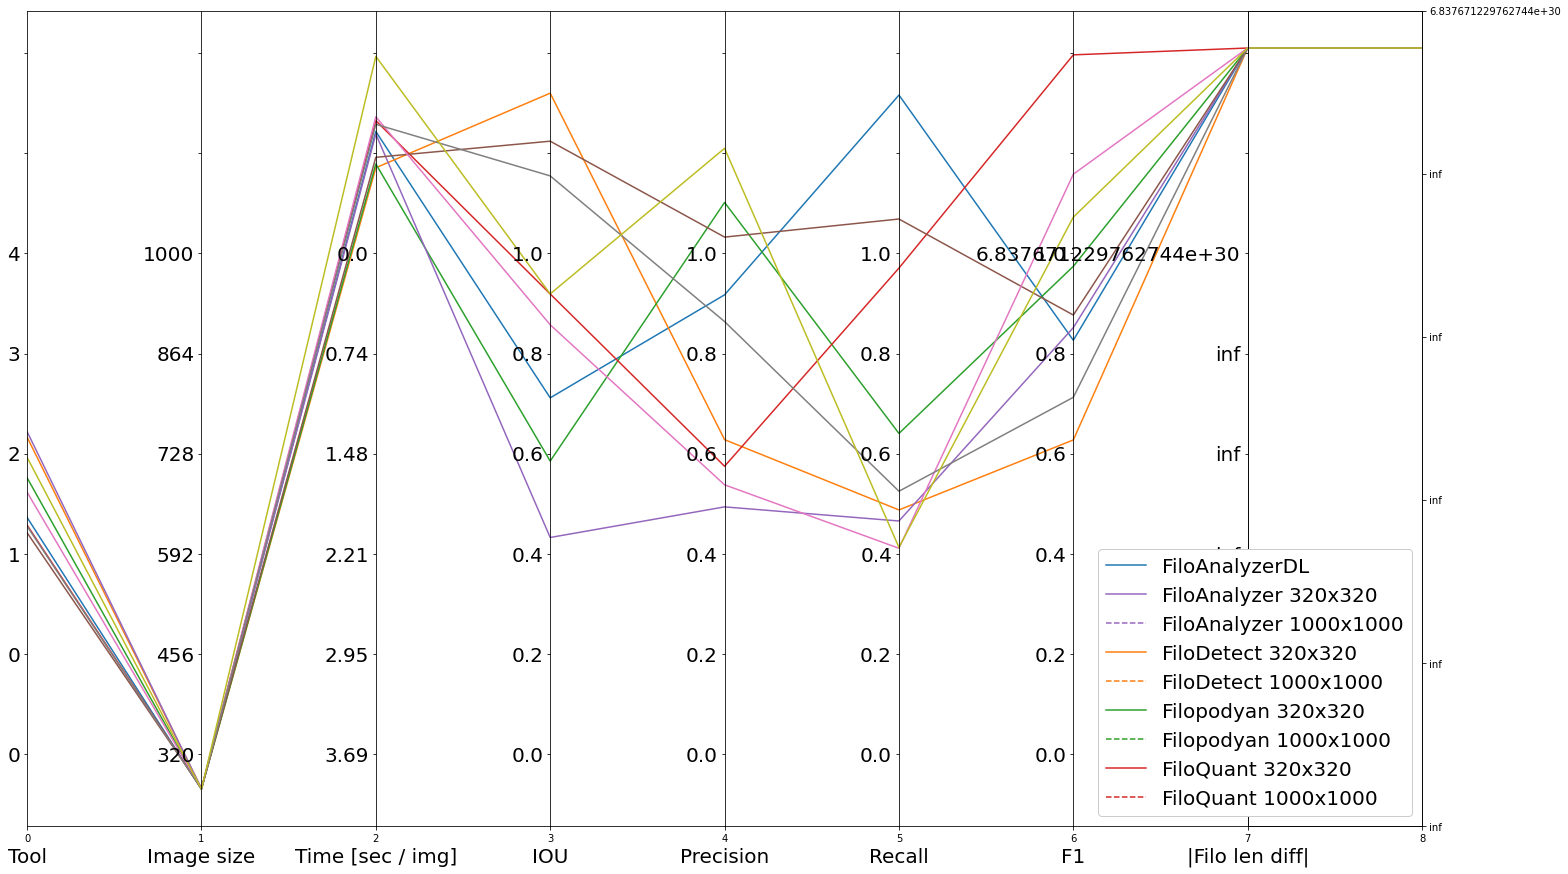

In [211]:

import random
df = pd.read_csv('resultTables/FINAL_COMPARISON.csv')
df["Tool"] = df["Tool"].astype('category').cat.codes
df = df.rename(columns={'Tool': 'Tool',
                   'size': 'Image size',
                   'time': 'Time [sec / img]',
                   'PRECISION': 'Precision',
                   'RECALL': 'Recall',
                   '|Filo # difference|':'|Filo # diff|',
                   '|Filo len difference|':'|Filo len diff|'})
col_names = ["Tool", "Image size","Time [sec / img]", "IOU", "Precision", "Recall", "F1", "|Filo # diff|", "|Filo len diff|"]
df["|Filo # diff|"] = df["|Filo len diff|"]
data = df[col_names].to_numpy()
#data[:,-2:] = np.log(data[:,-2:])
#data = (data / data)
colors = ["red", "blue", "yellow", "green", "black", "pink", "orange", "purple", "teal"]
ranges = [
    (max(data[:,0]), min(data[:,0]), max(data[:,0]) - min(data[:,0])),
    (1000, 320, 1000 - 320),
    #(max(df["time"]), min(df["time"]), max(df["time"]) - min(df["time"])),
    (0, max(df["Time [sec / img]"]), 0 - max(df["Time [sec / img]"])),
    (1, 0, 1),
    (1, 0, 1),
    (1, 0, 1),
    (1, 0, 1),
    #(max(df["Filo # difference"]), min(df["Filo # difference"]), max(df["Filo # difference"]) - min(df["Filo # difference"])),
    (min(data[:,-2]), max(data[:,-2]), min(data[:,-2]) - max(data[:,-2])),
    #(max(df["Filo len difference"]), min(df["Filo len difference"]), max(df["Filo len difference"]) - min(df["Filo len difference"])),
    (min(data[:,-1]), max(data[:,-1]), min(data[:,-1]) - max(data[:,-1]))
]
parallel_coordinates(np.random.random(data.shape), style=None, ranges=ranges, dim_names=col_names).show()

In [8]:
import pandas as pd
from bs4 import BeautifulSoup
import datetime

with open('../../Downloads/bookmarks_03_12_23.html', 'r', encoding='utf-8') as f:
    html_content = f.read()

soup = BeautifulSoup(html_content, 'lxml')

bookmarks = []
for bookmark in soup.find_all('a'):
    title = bookmark.text.strip()
    href = bookmark.get('href')
    date = int(bookmark.get('add_date'))
    date = datetime.datetime.fromtimestamp(date).strftime("%Y-%m-%d")
    if href and title:
        bookmarks.append({'href': href, 'title': title, 'date': date})

df = pd.DataFrame(bookmarks)
df


,href,title,date
0,https://www.youtube.com/watch?v=VScHoVQVjmU,Adobe After Effects CC - Download Optical Flar...,2015-06-30
1,https://www.youtube.com/watch?v=qnKAGu0O7_8,Free Program For After Effects Tutorial: Magic...,2015-06-29
2,https://www.youtube.com/watch?v=nfaJUf1IbA4,Free Element 3D Materials - YouTube,2015-07-01
3,https://www.youtube.com/watch?v=X-6CWBXU4Ys,Download Twixtor Pro For Free After effects cc...,2015-08-28
4,https://www.youtube.com/watch?v=IHWRGFVj3EM,How To Get RSMB for Adobe After Effects (CS6 C...,2016-04-10
...,...,...,...
1437,https://www.pluralsight.com/paths/microsoft-ex...,corso pluralsight,2023-09-19
1438,https://www.examtopics.com/exams/microsoft/ai-...,lista domande,2023-09-19
1439,https://www.coursera.org/learn/ai-102-microsof...,corso coursera,2023-09-19
1440,https://www.mindomo.com/mindmap/ab8f74e8242a43...,AI102,2023-10-24
